In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/AAPL.csv')

1.We will collect the Stock Data-- Apple

2.Preprocess the Data-Train and Test

3.Create an Stacked LSTM Model

4.Predict the test data and plot the output

5.Predict the future 30 days and plot the output

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [ ]:
df.shape

(1258, 15)

In [ ]:
df1[1228:]

1228    273.25
1229    287.05
1230    284.43
1231    286.69
1232    282.80
1233    276.93
1234    268.37
1235    276.10
1236    275.03
1237    282.97
1238    283.17
1239    278.58
1240    287.73
1241    293.80
1242    289.07
1243    293.16
1244    297.56
1245    300.63
1246    303.74
1247    310.13
1248    315.01
1249    311.41
1250    307.65
1251    309.54
1252    307.71
1253    314.96
1254    313.14
1255    319.23
1256    316.85
1257    318.89
Name: close, dtype: float64

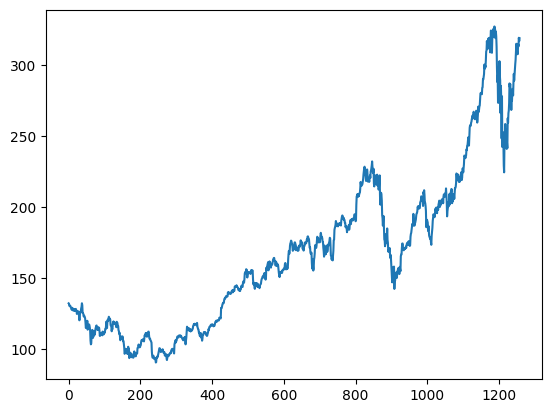

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
##LSTM are sensitive to the scale of data ,so we apply MinMax Scaler.

In [ ]:
import numpy as np

In [ ]:
df1.shape

(1258,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1258, 1)

In [ ]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train, y_train=create_dataset(train_data, time_step)
X_test, y_test=create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [ ]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
print(X_train)

[[[0.17607447]
  [0.17495567]
  [0.16862282]
  ...
  [0.09055982]
  [0.08388922]
  [0.09085536]]

 [[0.17495567]
  [0.16862282]
  [0.1696994 ]
  ...
  [0.08388922]
  [0.09085536]
  [0.0873934 ]]

 [[0.16862282]
  [0.1696994 ]
  [0.16727181]
  ...
  [0.09085536]
  [0.0873934 ]
  [0.09030651]]

 ...

 [[0.34801148]
  [0.32930845]
  [0.32145571]
  ...
  [0.50042219]
  [0.50413747]
  [0.5062062 ]]

 [[0.32930845]
  [0.32145571]
  [0.32694419]
  ...
  [0.50413747]
  [0.5062062 ]
  [0.51920966]]

 [[0.32145571]
  [0.32694419]
  [0.32230009]
  ...
  [0.5062062 ]
  [0.51920966]
  [0.53719497]]]


In [ ]:
#Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 339ms/step - loss: 0.0185 - val_loss: 0.0565
Epoch 2/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 4s 317ms/step - loss: 0.0011 - val_loss: 0.0105
Epoch 4/100
12/12 [==============================] - 4s 314ms/step - loss: 7.9740e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 3s 247ms/step - loss: 5.7912e-04 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 3s 234ms/step - loss: 5.7314e-04 - val_loss: 0.0036
Epoch 7/100
12/12 [==============================] - 3s 247ms/step - loss: 5.6771e-04 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 4s 369ms/step - loss: 5.8233e-04 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 3s 248ms/step - loss: 5.6789e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 3s 217ms/ste

In [ ]:
#Lets Do the prediction and Check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 43ms/step


In [ ]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performnce metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.64709117979586

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

237.36681516540145